## SUPPORT VECTOR MACHINES
----

#### Understanding the Dataset
The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

----

**Notebook Work**: Within this dataset, slum test and compressive strengths can act as an indicator for improperly mixed concrete based on the components used. Using the powerful ML Model *Support Vector Machines*, I am going to implement the SVR (Regression Model) for predictive Analysis based on the input variables so that we can work on any **unseen** data of "concrete mixture of components" and predict a compressive strength value so that the observer can understand the workability and performance of created concrete block.

### Importing Common Dependencies

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../DATA/cement_slump.csv')

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


### Exploratory Data Analysis

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [14]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

##### Observation
* Some considerations, about 'Cement' and 'Fly Ash' components with +ve correlation, that means increase in units of cement and fly ash, does strengthen the concrete longetivity.
* Other features are negatively correlated, that describes minimizing those units for strengthening concrete

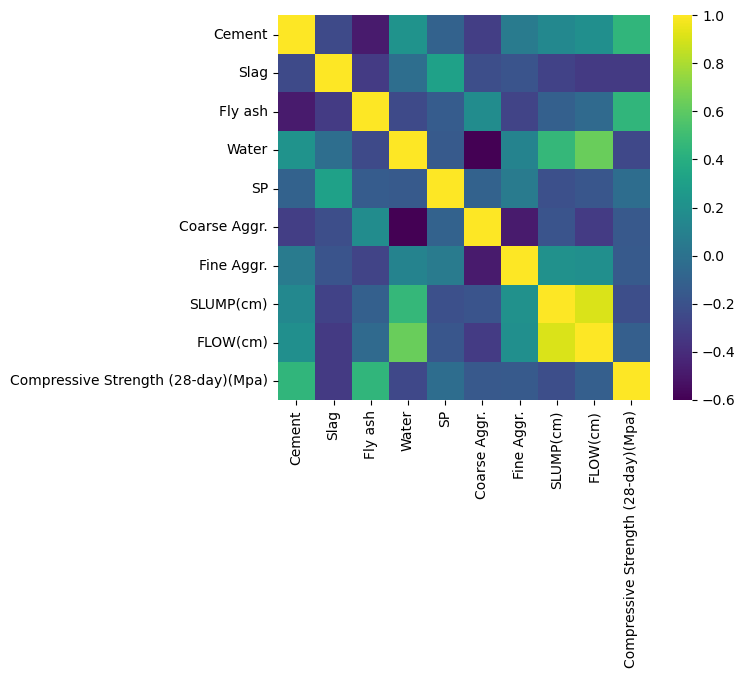

In [29]:
#Let's review the correlation graphically
plt.figure(figsize = (6,5))
sns.heatmap(df.corr(), cmap = "viridis");

### Train | Test Split

In [38]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [40]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis = 1)
y = df['Compressive Strength (28-day)(Mpa)']

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

We have prepared the training and test sets for our model!

### Preparing a pipeline of operations 
Considering the fact that we might do iterative processes of model selection and training on scaled data, so this encounter does require defining operations/processes under a pipeline that can be directly called everytime for any observation or model check.

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR

In [85]:
# We have created a pipeline "pipe" that can be directly called to do two steps: Scale features and initiate model
pipe = make_pipeline(StandardScaler(), SVR())

### Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

----
Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization (more misclassification leniency)

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

----

In [76]:
#To analyse results with base model, with no hyperparameter tuning and cross validation
pipe.fit(X_train, y_train)
base_pred = pipe.predict(X_test)

In [78]:
#Test using metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, base_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, base_pred)))

Mean Absolute Error (MAE): 2.7366332228938366
Root Mean Squared Error (RMSE): 3.5124129691230115


### Can we improve while reducing the errors?
Let's try to utilize **Cross Validation** and **Hyperparameter Tuning** through GridSearchCV to find out the best possible model.

In [81]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'precomputing'],
    'svr__C' : [0.001, 0.01, 0.1, 0.5, 1],
    'svr__degree' : [2,3,4],
    'svr__gamma' : ['scale', 'auto'],
    'svr__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2]
}

In [93]:
grid_SVR = GridSearchCV(pipe, param_grid)

In [99]:
grid_SVR.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'svr__degree': [2, 3, 4],
                         'svr__epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'poly', 'rbf',
                                         'precomputing']})

In [101]:
grid_pred = grid_SVR.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, grid_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, grid_pred)))

Mean Absolute Error (MAE): 1.953364573705227
Root Mean Squared Error (RMSE): 2.181189436547741


In [103]:
grid_SVR.best_params_

{'svr__C': 1,
 'svr__degree': 2,
 'svr__epsilon': 2,
 'svr__gamma': 'scale',
 'svr__kernel': 'linear'}

### Comparison of Performance metrics

1. Basic Model (With no hyperparameter tuning and cross-validation)

   Mean Absolute Error (MAE): 2.7366332228938366

   Root Mean Squared Error (RMSE): 3.5124129691230115

3. Grid Model (Hyperparameter Tuning + Cross Validation)

   Mean Absolute Error (MAE): 1.953364573705227

   Root Mean Squared Error (RMSE): 2.181189436547741

It is clear that we're getting better results from GridSearchCV. Thus, it becomes crucial while using SVM that we **must work** on the parameters so that we can get a better accuracy.

----

### Conclusion
The average value of **Compressive Strength (28-day)(Mpa)** is 36.03 -- This can define a context to talk about the errors that our model is going to generate. MAE of around 1.95 will state that we should keep **5.4%** of error margin while calculating the target value (Compressive Strength) based on the feature values (elements of concrete) provided. 

***This also means that the model is around 95% accurate in terms of predicting target values***

----

### Author
[Sourav Syal](https://www.linkedin.com/in/sourav-syal/)